## K-Nearest Neighbours

#### SuperVised Machine Learning --> Classification 

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [5]:
df = pd.read_csv("Classified Data",index_col=0)

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


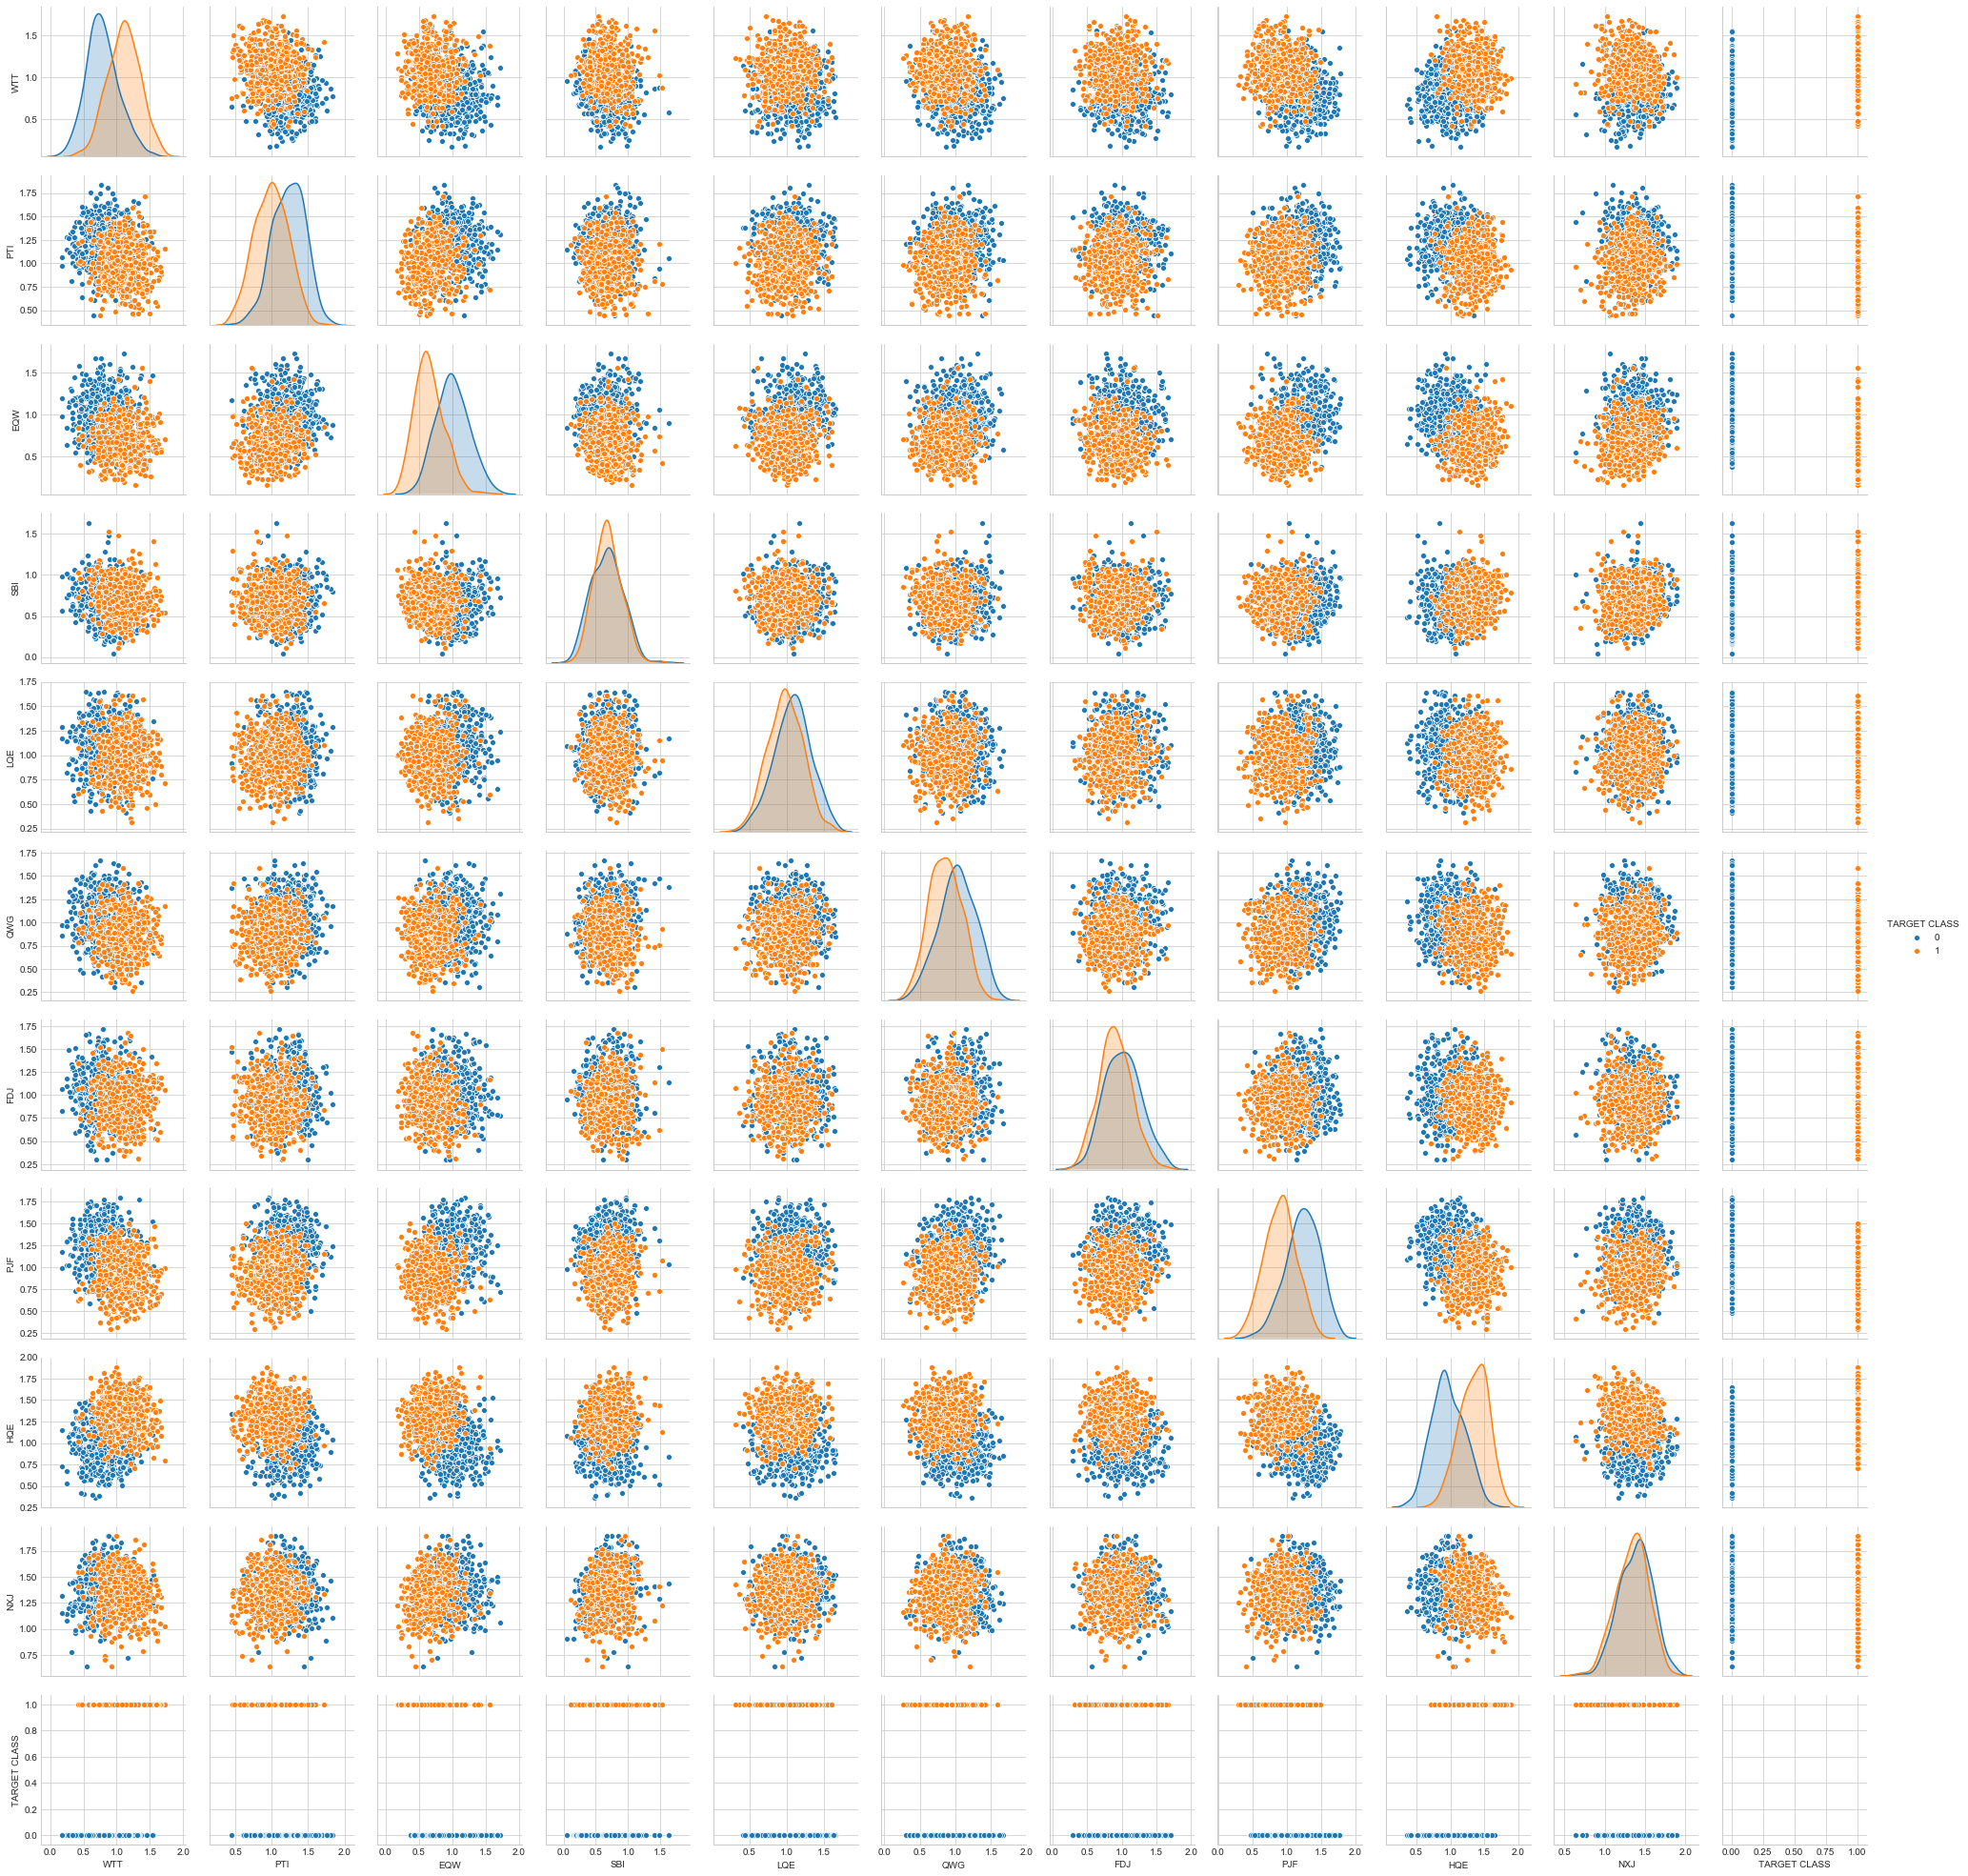

In [7]:
sns.pairplot(df,hue='TARGET CLASS')

In [8]:
df.shape

(1000, 11)

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
features = scaler.fit_transform(df.drop("TARGET CLASS",axis=1))

In [15]:
features = pd.DataFrame(features,columns=df.columns[:-1])

In [16]:
features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [17]:
target = pd.Series(df["TARGET CLASS"])

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model = KNeighborsClassifier(n_neighbors=10)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target)

In [42]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [43]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [45]:
print(confusion_matrix(y_test,y_pred))

[[115   8]
 [  6 121]]


In [46]:
print(accuracy_score(y_test,y_pred))

0.944


### best k value 

#### Elbow Method to find best K-value

In [51]:
acc = { }
for k in range(1,30):
    new_model = KNeighborsClassifier(n_neighbors=k)
    new_model.fit(X_train,y_train)
    p = new_model.predict(X_test)
    a = accuracy_score(y_test,p)
    acc[k] = a 
    

In [53]:
acc

{1: 0.904,
 2: 0.9,
 3: 0.928,
 4: 0.932,
 5: 0.932,
 6: 0.936,
 7: 0.928,
 8: 0.936,
 9: 0.94,
 10: 0.944,
 11: 0.948,
 12: 0.948,
 13: 0.94,
 14: 0.94,
 15: 0.944,
 16: 0.952,
 17: 0.944,
 18: 0.944,
 19: 0.944,
 20: 0.952,
 21: 0.952,
 22: 0.956,
 23: 0.956,
 24: 0.956,
 25: 0.96,
 26: 0.96,
 27: 0.956,
 28: 0.956,
 29: 0.952}

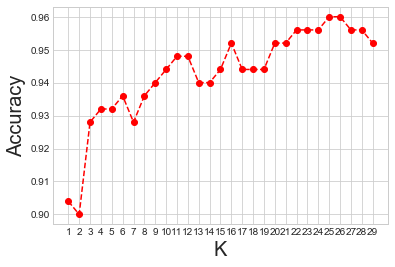

In [56]:
plt.plot(acc.keys(),acc.values(),'ro--')
plt.xlabel("K",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.xticks(list(acc.keys()))
plt.show()

In [58]:
np.mean(y_test != y_pred)

0.056

In [64]:
acc = { }
for k in range(1,30):
    new_model = KNeighborsClassifier(n_neighbors=k)
    new_model.fit(X_train,y_train)
    p = new_model.predict(X_test)
    e = np.mean(y_test != p)
    acc[k] = e
    

In [65]:
acc

{1: 0.096,
 2: 0.1,
 3: 0.072,
 4: 0.068,
 5: 0.068,
 6: 0.064,
 7: 0.072,
 8: 0.064,
 9: 0.06,
 10: 0.056,
 11: 0.052,
 12: 0.052,
 13: 0.06,
 14: 0.06,
 15: 0.056,
 16: 0.048,
 17: 0.056,
 18: 0.056,
 19: 0.056,
 20: 0.048,
 21: 0.048,
 22: 0.044,
 23: 0.044,
 24: 0.044,
 25: 0.04,
 26: 0.04,
 27: 0.044,
 28: 0.044,
 29: 0.048}

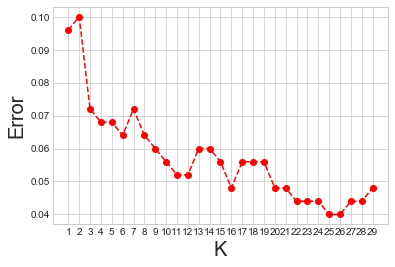

In [66]:
plt.plot(acc.keys(),acc.values(),'ro--')
plt.xlabel("K",fontsize=20)
plt.ylabel("Error",fontsize=20)
plt.xticks(list(acc.keys()))
plt.show()

y = f(x) --> parametric 


Recommandation --> Movie Recommandations 

In [ ]:
ml_exercise( project )
ml_excercise_solution 